In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import skfuzzy
import numpy
print(skfuzzy.__version__)
print(numpy.__version__)

0.4.2
2.0.1


In [11]:
# Load log file
waiting_ctrl = pd.read_csv('graphs/WAITING_VEHICLES/waiting_controlled.txt', sep='\t', names=['step', 'waiting'])
waiting_base = pd.read_csv('graphs/WAITING_VEHICLES/waiting_baseline.txt', sep='\t', names=['step', 'waiting'])

delay_ctrl = pd.read_csv('graphs/STOPPED_VEHICLES/delay_controlled.txt', sep='\t', names=['step', 'delay'])
delay_base = pd.read_csv('graphs/STOPPED_VEHICLES/delay_baseline.txt', sep='\t', names=['step', 'delay'])

queue_ctrl = pd.read_csv('graphs/QUEUE_LENGTH/queue_controlled.txt', sep='\t', names=['step', 'queue'])
queue_base = pd.read_csv('graphs/QUEUE_LENGTH/queue_baseline.txt', sep='\t', names=['step', 'queue'])

In [12]:
df_pure = pd.DataFrame({
    "step": waiting_ctrl['step'],
    "waiting_controlled": waiting_ctrl['waiting'],
    "waiting_baseline": waiting_base['waiting'],
    "delay_controlled": delay_ctrl['delay'],
    "delay_baseline": delay_base['delay'],
    "queue_controlled": queue_ctrl['queue'],
    "queue_baseline": queue_base['queue'],
    "Improvement Waiting": (waiting_base['waiting'] - waiting_ctrl['waiting']) / waiting_base['waiting'] * 100,
    "Improvement Delay": (delay_base['delay'] - delay_ctrl['delay']) / delay_base['delay'] * 100,
    "Improvement Queue": (queue_base['queue'] - queue_ctrl['queue']) / queue_base['queue'] * 100
})

# Hitung rata-rata
df_eval = pd.DataFrame({
    "metric": ["Average Waiting Time", "Average Delay", "Average Queue Length"],
    "Fuzzy logic controlled traffic": [
        waiting_ctrl['waiting'].mean(),
        delay_ctrl['delay'].mean(),
        queue_ctrl['queue'].mean()
    ],
    "Fixed time controlled traffic": [
        waiting_base['waiting'].mean(),
        delay_base['delay'].mean(),
        queue_base['queue'].mean()
    ]
})

# Hitung persentase perbaikan
df_eval["Improvement (%)"] = (df_eval["Fixed time controlled traffic"] - df_eval["Fuzzy logic controlled traffic"]) / df_eval["Fixed time controlled traffic"] * 100

In [13]:
df_eval.head()

,metric,Fuzzy logic controlled traffic,Fixed time controlled traffic,Improvement (%)
0,Average Waiting Time,19.570397,27.452677,28.712246
1,Average Delay,11.475153,17.403407,34.063752
2,Average Queue Length,13.809000,15.077000,8.410161


In [24]:
# Hitung statistik tambahan: standard deviation & median
stats_eval = pd.DataFrame({
    "metric": ["Waiting Time", "Delay", "Queue Length"],
    "STD Baseline": [
        waiting_base['waiting'].std(),
        delay_base['delay'].std(),
        queue_base['queue'].std()
    ],
    "STD Controlled": [
        waiting_ctrl['waiting'].std(),
        delay_ctrl['delay'].std(),
        queue_ctrl['queue'].std()
    ],
    "Median Controlled": [
        waiting_ctrl['waiting'].median(),
        delay_ctrl['delay'].median(),
        queue_ctrl['queue'].median()
    ],
    "Median Baseline": [
        waiting_base['waiting'].median(),
        delay_base['delay'].median(),
        queue_base['queue'].median()
    ]
})

stats_eval["Median Improvement (%)"] = (stats_eval["Median Baseline"] - stats_eval["Median Controlled"]) / stats_eval["Median Baseline"] * 100

stats_eval["STD Improvement (%)"] = (stats_eval["STD Baseline"] - stats_eval["STD Controlled"]) / stats_eval["STD Baseline"] * 100

print("=== Additional Statistical Analysis ===")
stats_eval.head()

=== Additional Statistical Analysis ===


,metric,STD Baseline,STD Controlled,Median Controlled,Median Baseline,Median Improvement (%),STD Improvement (%)
0,Waiting Time,14.389003,12.202573,17.86,27.000,33.851852,15.195151
1,Delay,8.923085,7.377517,10.52,18.285,42.466503,17.321002
2,Queue Length,2.068130,2.240579,14.00,15.000,6.666667,-8.338361


In [15]:
df_pure.head()

,step,waiting_controlled,waiting_baseline,delay_controlled,delay_baseline,queue_controlled,queue_baseline,Improvement Waiting,Improvement Delay,Improvement Queue
0,0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
1,1,0.0,0.0,0.0,0.0,2,2,NaN,NaN,0.0
2,2,0.0,0.0,0.0,0.0,2,2,NaN,NaN,0.0
3,3,0.0,0.0,0.0,0.0,2,2,NaN,NaN,0.0
4,4,0.0,0.0,0.0,0.0,2,2,NaN,NaN,0.0


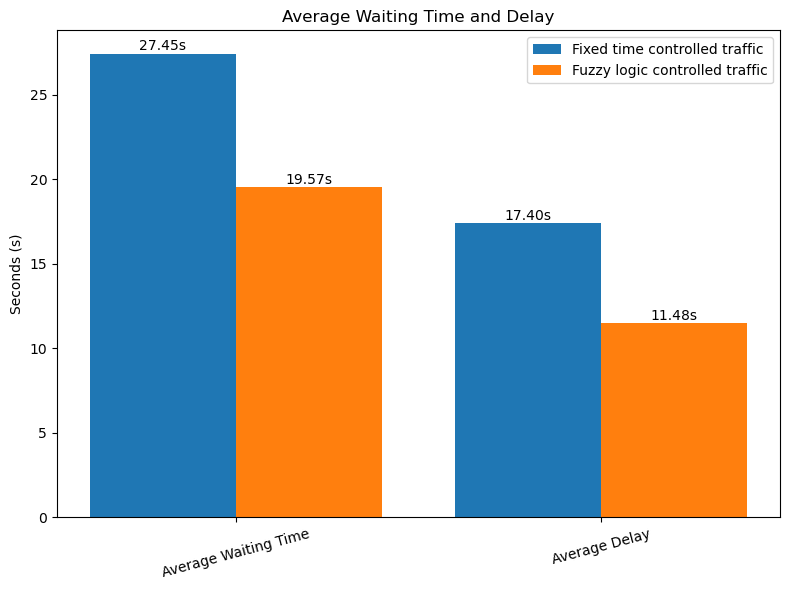

In [16]:
df_filtered = df_eval[df_eval['metric'].isin(['Average Waiting Time', 'Average Delay'])].reset_index(drop=True)
x = range(len(df_filtered))
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
plt.bar([i - 0.2 for i in x], df_filtered['Fixed time controlled traffic'], width=0.4, label='Fixed time controlled traffic', color=colors[0])
plt.bar([i + 0.2 for i in x], df_filtered['Fuzzy logic controlled traffic'], width=0.4, label='Fuzzy logic controlled traffic', color=colors[1])

# Tambahkan label angka
for i, val in enumerate(df_filtered['Fixed time controlled traffic']):
    plt.text(i - 0.2, val + 0.01, f'{val:.2f}s', ha='center', va='bottom')
for i, val in enumerate(df_filtered['Fuzzy logic controlled traffic']):
    plt.text(i + 0.2, val + 0.01, f'{val:.2f}s', ha='center', va='bottom')

plt.xticks(x, df_filtered['metric'], rotation=15)
plt.ylabel('Seconds (s)')
plt.title('Average Waiting Time and Delay')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Defa Danuarta\AppData\Local\Temp\ipykernel_4176\960004754.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Fixed time controlled traffic', 'Fuzzy logic controlled traffic'], y=[df_queue['Fixed time controlled traffic'].iloc[0], df_queue['Fuzzy logic controlled traffic'].iloc[0]], palette=colors)


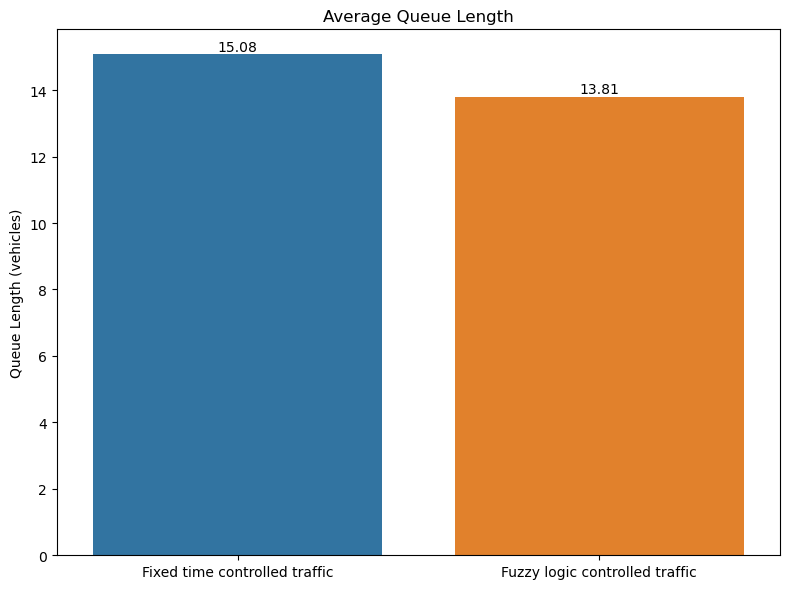

In [17]:
df_queue = df_eval[df_eval['metric'] == 'Average Queue Length'].reset_index(drop=True)

plt.figure(figsize=(8, 6))
# plt.bar(['Fixed time controlled traffic'], df_queue['Fixed time controlled traffic'], width=0.4, label='Fixed time controlled traffic', color=colors[0])
# plt.bar(['Fuzzy logic controlled traffic'], df_queue['Fuzzy logic controlled traffic'], width=0.4, label='Fuzzy logic controlled traffic', color=colors[1])


sns.barplot(x=['Fixed time controlled traffic', 'Fuzzy logic controlled traffic'], y=[df_queue['Fixed time controlled traffic'].iloc[0], df_queue['Fuzzy logic controlled traffic'].iloc[0]], palette=colors)
# Label angka
plt.text(0, df_queue['Fixed time controlled traffic'].iloc[0] + 0.1, f"{df_queue['Fixed time controlled traffic'].iloc[0]:.2f}", ha='center')
plt.text(1, df_queue['Fuzzy logic controlled traffic'].iloc[0] + 0.1, f"{df_queue['Fuzzy logic controlled traffic'].iloc[0]:.2f}", ha='center')

plt.ylabel('Queue Length (vehicles)')
plt.title('Average Queue Length')
plt.tight_layout()
plt.show()

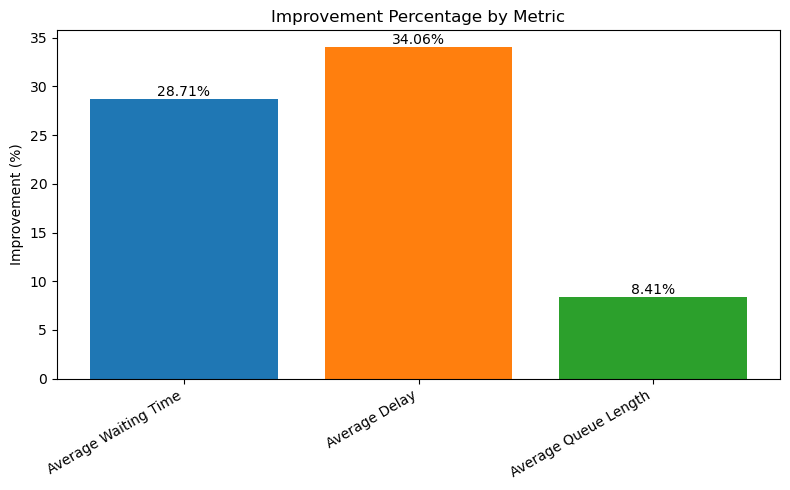

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(df_eval['metric'], df_eval["Improvement (%)"], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}%', ha='center', va='bottom')
plt.ylabel('Improvement (%)')
plt.title('Improvement Percentage by Metric')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

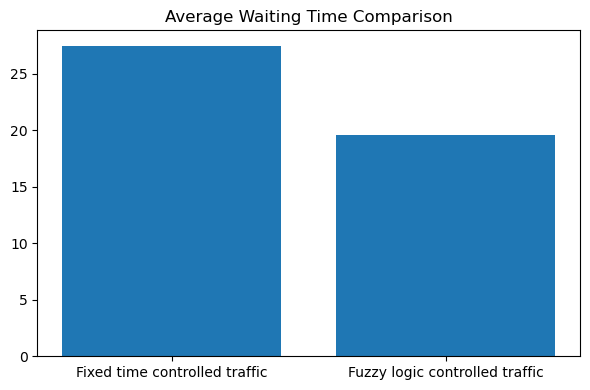

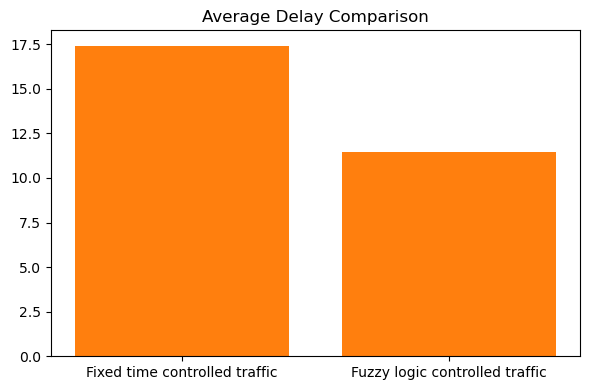

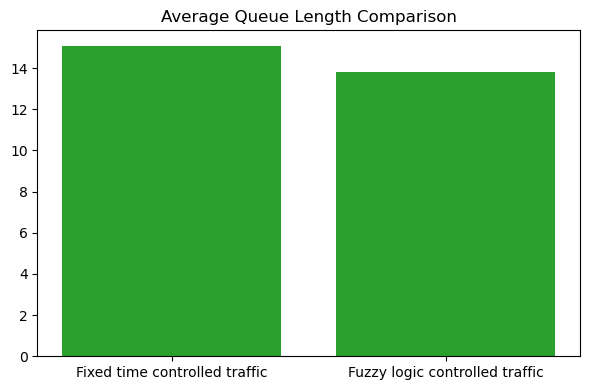

In [19]:
# Plot per metric comparison (default color)
for i, row in df_eval.iterrows():
    plt.figure(figsize=(6, 4))
    bars = plt.bar(
        ["Fixed time controlled traffic", "Fuzzy logic controlled traffic"],
        [row["Fixed time controlled traffic"], row["Fuzzy logic controlled traffic"]],
        color = colors[i % len(colors)]
    )
    plt.title(f"{row['metric']} Comparison")
    plt.ylabel("")  
    plt.tight_layout()
    plt.show()
